<a href="https://colab.research.google.com/github/danielmayfield/coms605-AI/blob/main/AI_Supervised_Learning_Example_Linear_Regression_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Importing the data

In [ ]:
url = "https://github.com/cm326/Data/raw/master/exam_results.csv"

data = pd.read_csv(url, index_col = 0).round(1)

data.head()

,Study Hours,Exam Score
0,5.5,63.3
1,7.2,57.0
2,5.4,54.1
3,4.2,50.6
4,6.5,52.4


In [ ]:
data.describe()

,Study Hours,Exam Score
count,100.000000,100.000000
mean,4.729000,60.583000
std,2.900028,19.466138
min,0.000000,25.200000
25%,2.075000,44.325000
50%,4.700000,57.250000
75%,6.825000,74.900000
max,9.900000,100.000000


## Visualising the data

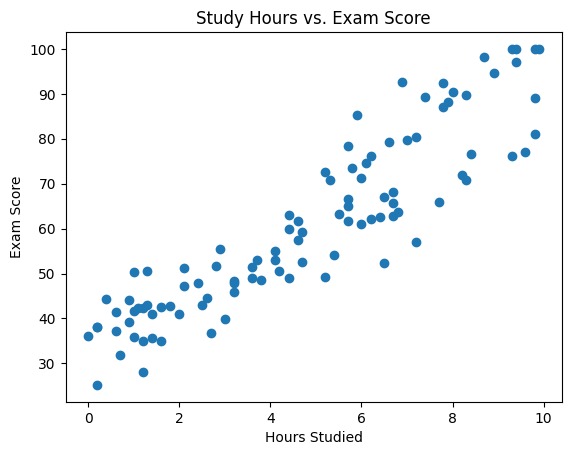

In [ ]:
X = data['Study Hours'].to_numpy().reshape(-1,1)
Y = data['Exam Score'].to_numpy()
plt.scatter(X, Y)
plt.title("Study Hours vs. Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()

## Fitting the model

In [ ]:
model = LinearRegression()

model.fit(X,Y)

intercept = model.intercept_
slope = model.coef_

print(f'Intercept: {intercept}')
print(f'Slope: {slope[0]}')

Intercept: 31.708761564144577
Slope: 6.105781018366551


intercept = where the line crosses the y axis at 0

## Evaluating the model

In [ ]:
from sklearn.metrics import mean_squared_error

y_prediction = model.predict(X)

mse = mean_squared_error(Y, y_prediction)

print(f'Mean Squared Error: {mse}')


Mean Squared Error: 64.74105353166486


8 percentage points off, on prediction

## Visualising the model

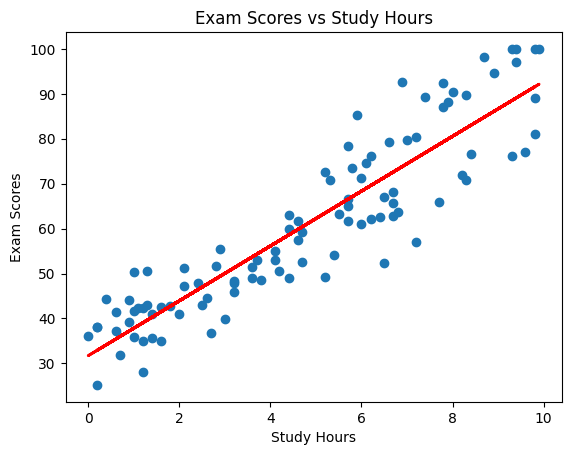

In [ ]:
plt.scatter(X, Y)

plt.plot(X, y_prediction, color='red', linewidth=2)

plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.title('Exam Scores vs Study Hours')
plt.show()


## Splitting into training - test sets

In [ ]:
X_train = X[:75]

X_test = X[75:]

Y_train = Y[:75]

Y_test = Y[75:]

model2 = LinearRegression()

model2.fit(X_train,Y_train)

Intercept = model2.intercept_
Slope = model2.coef_

print(f'Intercept: {Intercept}')
print(f'Slope: {Slope[0]}')


Intercept: 34.755647333453055
Slope: 4.503933135443511


## Evaluating the model

In [ ]:
y_pred = model2.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 348.90331395732994


In [ ]:
mse**(1/2)

18.67895377041578

~ 19 percentage points off

## Visualising the model

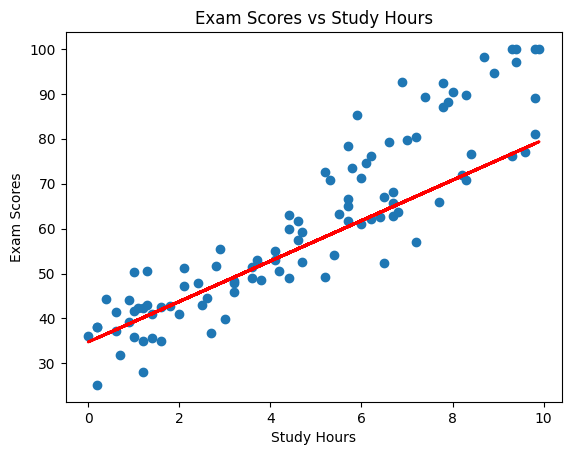

In [ ]:
plt.scatter(X, Y)

Y_line = Intercept + Slope*X

plt.plot(X, Y_line, color='red', linewidth=2)

plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.title('Exam Scores vs Study Hours')
plt.show()

## Visualising the train/test set with model

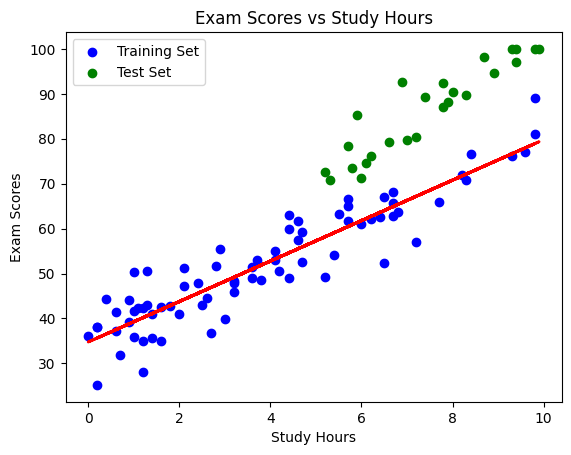

In [ ]:
plt.scatter(X_train, Y_train,color = 'blue', label = 'Training Set')
plt.scatter(X_test, Y_test,color = 'green', label = 'Test Set')

Y_line = Intercept + Slope*X

plt.plot(X, Y_line, color='red', linewidth=2)

plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.title('Exam Scores vs Study Hours')
plt.legend()
plt.show()

## Randomised training/test set split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

model3 = LinearRegression()

model3.fit(X_train,y_train)

Intercept_2 = model3.intercept_
Slope_2 = model3.coef_

print(f'Intercept: {Intercept_2}')
print(f'Slope: {Slope_2[0]}')

Intercept: 31.348908763454972
Slope: 6.072673214462367


## Evaluating the model

In [ ]:
y_pred2 = model3.predict(X_test)

mse = mean_squared_error(y_test, y_pred2)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 81.14645061906181


In [ ]:
mse**(1/2)

9.008132471220758

9 percentage points off

## Visualising with the new training/test sets

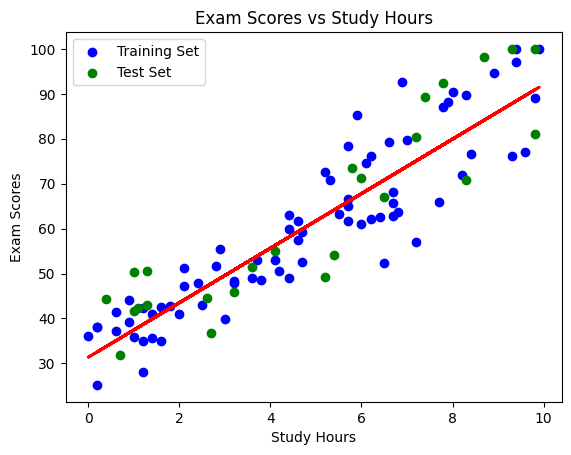

In [ ]:
plt.scatter(X_train, y_train,color = 'blue', label = 'Training Set')
plt.scatter(X_test, y_test,color = 'green', label = 'Test Set')

Y_line = Intercept_2 + Slope_2*X

plt.plot(X, Y_line, color='red', linewidth=2)

plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.title('Exam Scores vs Study Hours')
plt.legend()
plt.show()

## Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=0)

model_cv = LinearRegression()

scores = cross_val_score(model_cv, X, Y, cv=kf, scoring='neg_mean_squared_error')

print(f"Mean squared scores for the 5 folds: {-scores}")
print(f"Average MSE score: {-scores.mean()}")
print(f"Standard deviation: {scores.std()}")

Mean squared scores for the 5 folds: [ 56.21623455  78.83500167 102.79433898  80.65898703  49.90826398]
Average MSE score: 73.6825652426443
Standard deviation: 18.93675547993743


## Metrics

When evaluating the performance of a linear regression model, several metrics can be used. Here's a summary of commonly used metrics for linear regression:

1. **Mean Absolute Error (MAE)**:
    - It measures the average absolute difference between observed actual outcomes and predictions.
    - Formula:  $\frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$
    - Pros: Easy to understand and interpret.
    - Cons: Does not heavily penalize large errors.

2. **Mean Squared Error (MSE)**:
    - It measures the average squared difference between the observed actual outcomes and predictions.
    - Formula: $\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
    - Pros: Emphasizes larger errors over smaller ones.
    - Cons: Can be sensitive to outliers.

3. **Root Mean Squared Error (RMSE)**:
    - It's the square root of the MSE and provides the error in the same units as the response variable.
    - Formula: $\sqrt{MSE}$
    - Pros: Emphasizes larger errors and is in the same units as the target.
    - Cons: Still sensitive to outliers.

4. **R-squared ($R^2$)**: (For linear regression)
    - Represents the proportion of variance in the dependent variable that's explained by independent variables in the model.
    - Formula: $ 1 - \frac{MSE_{model}}{MSE_{baseline}}$
    - Pros: Provides an overall measure of the strength and direction of the relationship between predictors and response.
    - Cons: Might not always provide a clear indication of model quality, especially if the model is overfit.

5. **Adjusted R-squared**: (For linear regression)
    - Similar to $R^2$ but adjusts for the number of predictors in the model.
    - Formula: $1 - (1-R^2)\frac{n-1}{n-k-1}$ where $n$ is the number of observations and $k$ is the number of predictors.
    - Pros: Takes into account the complexity of the model.
    - Cons: It's not as intuitive as $R^2$.

